In [303]:
(366201)**2 * 8 / 1e9

1072.825379208

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
F(x,y) = 6x+6y
$$

$$
p(x,y)=x^3+y^3 + Cx +Dy + Exy +F
$$

$$
p(0,y)=p(1,y)=p(x,0)=p(x,1)=0
$$

$$
p(0,y)=0\Rightarrow y^3+Dy+F=0 \Rightarrow F=-y^3-Dy
$$

$$
p(x,y)=x^3+ Cx + Exy
$$

$$
p(x,0)=0 \Rightarrow x^3+ Cx + Exy = 0 \Rightarrow C = -Ey-x^2
$$

$$
p(x,y) = 
$$

In [171]:
N = 3 #number of rows
M = 5 #number of columns



# creating linspaces and meshgrids between 0 and 1
xx = np.linspace(0,1,N)
yy = np.linspace(0,1,M)

dx = (1-0)/(N-1)
dy = (1-0)/(M-1)

X, Y = np.meshgrid(xx, yy)

# making analytical solution for F(x,y) = 6x+6y
# giving p(x,y) = x^3 + y^3

F = np.zeros(N*M)
p_analytical = np.zeros(N*M)
F[4] = -100
F[9] = -100
F[14]= -100

A = 


"""
for i in range(0, N):
    for j in range(0, M):
        x = i*dx
        y = j*dy
        F[M*i+j] = 6*x + 6*y
        p_analytical[M*i+j] = x**3 + y**3
"""
#plotting analytical solution
#plt.contourf(X, Y, p_analytical.reshape(M, N), cmap="inferno", levels=5)
#plt.colorbar()
#plt.show()

F

array([   0.,    0.,    0.,    0., -100.,    0.,    0.,    0.,    0.,
       -100.,    0.,    0.,    0.,    0., -100.])

In [154]:
x = 1/dx**2 # "off-diagonal" element
y = 1/dy**2 # second diagonal element
z = -2*(dx+dy) #diagonal element

In [155]:
#creating matrix to try Gauss-Seidel
A = np.array([
    [z, y, 0, 0, x, 0, 0, 0, 0, 0, 0, 0],
    [y, z, y, 0, 0, x, 0, 0, 0, 0, 0, 0],
    [0, y, z, y, 0, 0, x, 0, 0, 0, 0, 0],
    [0, 0, y, z, y, 0, 0, x, 0, 0, 0, 0],
    [0, 0, 0, y, z, y, 0, 0, x, 0, 0, 0],
    [0, 0, 0, 0, y, z, y, 0, 0, x, 0, 0],
    [0, 0, 0, 0, 0, y, z, y, 0, 0, x, 0],
    [0, 0, 0, 0, 0, 0, y, z, y, 0, 0, x],
    [0, 0, 0, 0, 0, 0, 0, y, z, y, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, y, z, y, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, y, z, y],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, y, z]
])

In [156]:
# copied from web

def seidel(a, x ,b):
    #Finding length of a(3)       
    n = len(a)                   
    # for loop for 3 times as to calculate x, y , z
    for j in range(0, n):        
        # temp variable d to store b[j]
        d = b[j]                  
          
        # to calculate respective xi, yi, zi
        for i in range(0, n):     
            if(j != i):
                d-=a[j][i] * x[i]
        # updating the value of our solution        
        x[j] = d / a[j][j]
    # returning our updated solution           
    return x
"""
def gauss_seidel(A, b, max_iterations=1000, tol=1e-10):
    n = len(b)
    x = np.zeros_like(b)
    
    for it in range(max_iterations):
        x_old = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i, i]
            
        # Check convergence
        if np.linalg.norm(x - x_old, np.inf) < tol:
            return x, it
        
    raise ValueError("Gauss-Seidel did not converge after {} iterations.".format(max_iterations))"""

In [158]:
p_gs, it = gauss_seidel(A, F, tol=1e-1, max_iterations=int(1e4))

ValueError: Gauss-Seidel did not converge after 10000 iterations.

# STOP HERE

# STOP HERE

# STOP HERE

# STOP HERE

# STOP HERE

# STOP HERE

In [282]:
def forward_algo(i, z, y, x):
    #Men husk at vi lar kun i gå fra et visst punkt. Og mange av de tidlige er b_tilde=b
    #kan hende at indekseringen på i-M blir feil når vi går fra 0 istedetfor 1
    #tror heller ikke vi trenger denne algoritmen på siste vektor fordi den blir vel bare b_i
    b_tilde[i,0] = b[i,0] - y/b_tilde[i-1,0] * b_tilde[i-1,1] - x*x/b_tilde[i-M,0]
    
    for j in range(1, M):
        b_tilde[i,j] = b[i,j] - y/b_tilde[i-1,0] * b_tilde[i-1,j+1]
        
    F_tilde[i] = F[i] - y/b_tilde[i-1,0] * F_tilde[i-1] - x*x/b[i-M,0]
    
def backward_algo(i):
    p[i] = F_tilde[i]
    for j in range(1,M+1):
        p[i] -= b[i][j]*p[i-1+j]
    p[i] /= b[i][0]

In [281]:
M,N

(5, 3)

# Direct method

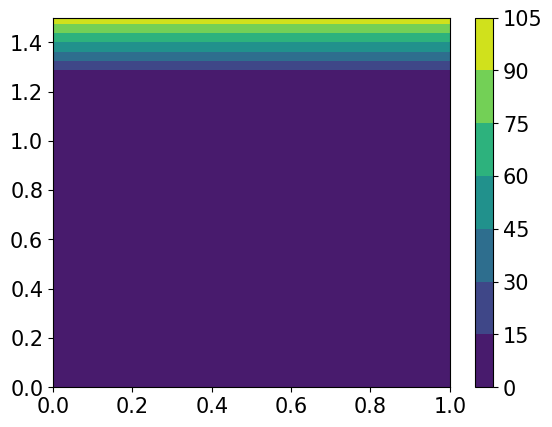

In [296]:
b = np.zeros((N+M,M+1))
b_tilde = np.zeros((N+M,M+1))

F = np.zeros(N*M)
F_tilde = np.zeros(N*M)

F[4], F[9], F[14] = -100, -100, -100


p = np.zeros(N*M)

b[:,0] = -4
b[:,1] = 1
for i in range(2, M):
    b[:,i] = 0
    
b[:,M] = 1

F_tilde[:M] = F[:M]
b_tilde[:,:M] = b[:,:M]

for i in range(M, N+M):
    forward_algo(i, -4, 1, 1)    

for i in range(M, N+M):
    backward_algo(i)
    
T = np.zeros_like(X)
T[-1,:] = 100

for n in range(1,6):
    T[n,1] = p[n-1]
    T[n,2] = p[n+5-1]
    T[n,3] = p[n+10-1]

fig, ax = plt.subplots()
surf = ax.contourf(X, Y, T, antialiased=False)
fig.colorbar(surf)
plt.show()

# Gauss-Seidel

In [288]:
A.shape, b.shape

((15, 15), (8, 6))

54


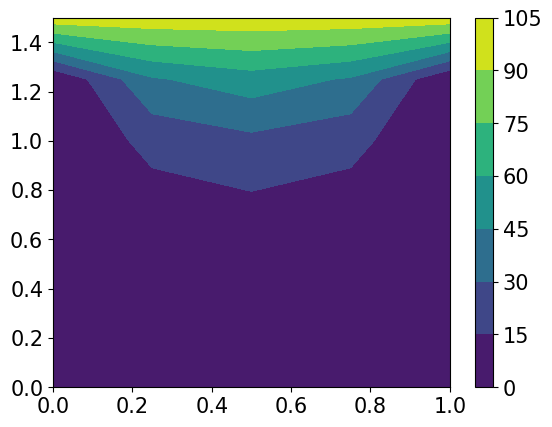

In [300]:
def gauss_seidel(A, b, max_iterations=1000, tol=1e-10):
    n = len(b)
    x = np.zeros_like(b)
    for it in range(max_iterations):
        x_old = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i, i]
            
        # Check convergence
        # divide this by max(x_old) and divided by sqrt(n)
        # max(x-x_old)/max(x_old) < tol // relative error of biggest point
        if np.linalg.norm(x - x_old, np.inf) < tol:
            return x, it
        
    raise ValueError("Gauss-Seidel did not converge after {} iterations.".format(max_iterations))

theta, it = gauss_seidel(A.toarray(), F)
print(it)


T = np.zeros_like(X)
T[-1,:] = 100

for n in range(1,6):
    T[n,1] = theta[n-1]
    T[n,2] = theta[n+5-1]
    T[n,3] = theta[n+10-1]

fig, ax = plt.subplots()
surf = ax.contourf(X, Y, T, antialiased=False)

fig.colorbar(surf)
plt.show()

In [297]:
N = 3
M = 5

dx = 0.25
dy = 0.25

# THIS DOES NOT WORK
x = 1/dx**2
y = 1/dx**2
z = -2*(x+y)

# THIS WORKS
z = -4
y = 1
x = 1

xx = np.linspace(0, 1, N+1)
yy = np.linspace(0, 1.5, M+1)
X,Y = np.meshgrid(xx,yy)

b = np.zeros(N*M)
x_analytical = np.zeros(N*M)
b[4] = -100
b[9] = -100
b[14]= -100

A_ = np.zeros((N*M,N*M))

z_pos = 0

for i in range(0,N*M):
    A_[i,:] = 0
    A_[i,z_pos] = z
    #A[i,x_pos] = x 
    if (i>0):
        A_[i,z_pos-1] = y
    if (i<M*N-1):
        A_[i,z_pos+1] = y
    
    if (i>M-1):
        A_[i,z_pos-M] = x
    
    if (i<M*N-M):
        A_[i,z_pos+M] = x
        
    z_pos+= 1

In [191]:
def analytical_solution(x,y):
    s = np.zeros_like(x)
    for n in range(100):
        lambda_n = np.pi*n
        A_n = 4/(np.sinh(3/2 * lambda_n))
        s+= A_n * np.sinh(lambda_n * y) * np.sin(lambda_n * x)
        
    return 100*s

/var/folders/k6/k6jkpmqs13l4qhz_xy4wzlmw0000gn/T/ipykernel_73048/2794335276.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  A_n = 4/(np.sinh(3/2 * lambda_n))
/var/folders/k6/k6jkpmqs13l4qhz_xy4wzlmw0000gn/T/ipykernel_73048/2794335276.py:6: RuntimeWarning: invalid value encountered in multiply
  s+= A_n * np.sinh(lambda_n * y) * np.sin(lambda_n * x)


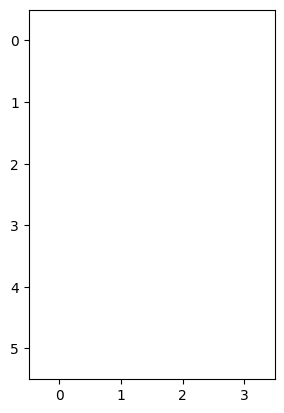

In [194]:
plt.imshow(analytical_solution(X,Y))

In [169]:
x,y,z

(16.0, 16.0, -64.0)

In [126]:
N*M

16

In [125]:
F.shape, A.shape

((16,), (12, 12))

ValueError: Gauss-Seidel did not converge after 100000 iterations.

sparse solver time: 0.007925033569335938
linalg solver time: 0.007239818572998047


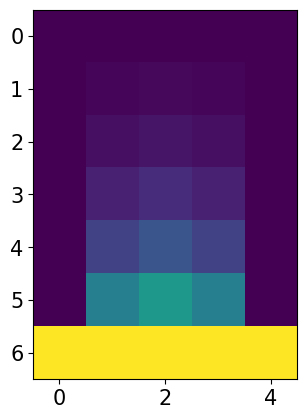

In [299]:
# src-ch7/laplace_Diriclhet1.py
import numpy as np
import scipy 
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
#import matplotlib; matplotlib.use('Qt4Agg')
import matplotlib.pylab as plt
import time
from math import sinh

#import matplotlib.pyplot as plt
# Change some default values to make plots more readable on the screen
LNWDT=2; FNT=15
plt.rcParams['lines.linewidth'] = LNWDT; plt.rcParams['font.size'] = FNT

# Set simulation parameters
n = 15
d = np.ones(n) # diagonals
b = np.zeros(n) #RHS
d0 = d*-4
d1 = d[0:-1]
d5 = d[0:10]

A = scipy.sparse.diags([d0, d1, d1, d5, d5], [0, 1, -1, 5, -5], format='csc')

#alternatively (scalar broadcasting version:)
#A = scipy.sparse.diags([1, 1, -4, 1, 1], [-5, -1, 0, 1, 5], shape=(15, 15)).toarray()

# update A matrix
A[4, 5], A[5, 4], A[10, 9], A[9, 10] = 0, 0, 0, 0
# update RHS:
b[4], b[9], b[14] = -100, -100, -100
#print A.toarray()

tic=time.time()
theta = scipy.sparse.linalg.spsolve(A,b) #theta=sc.linalg.solve_triangular(A,d)
toc=time.time()
print('sparse solver time:',toc-tic)

 
tic=time.time()
theta2=scipy.linalg.solve(A.toarray(),b)
toc=time.time()
print('linalg solver time:',toc-tic)

# surfaceplot:
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1.5, 7)

X, Y = np.meshgrid(x, y)

T = np.zeros_like(X)

T[-1,:] = 100

for n in range(1,6):
    T[n,1] = theta[n-1]
    T[n,2] = theta[n+5-1]
    T[n,3] = theta[n+10-1]
    
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig, ax = plt.subplots()
surf = ax.imshow(T)

#fig.colorbar(surf)
plt.show()

BC: I utgangspunkt Hard wall, dvs samme som grense = 0, men ikke hard code (extrapoler for BC på del^2p likning for eks.

Hard wall p1, s1, v1z. dv1x/dz=0, dv1y/dz=0

Tester først pertubations med gaussisk et eller annet i rho eller vx>>0 for eks for å se bevegelse.